<a href="https://colab.research.google.com/github/leokim-material/practice/blob/main/kaggle_awesome_hr_data_visualization_%26_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Kaggle: Awesome HR Data Visualization & Prediction
# https://www.kaggle.com/joshuaswords/awesome-hr-data-visualization-prediction/notebook

In [57]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from google.colab import files
import os
import seaborn as sns

In [4]:
#set graph formats
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.dpi'] = 200

In [5]:
#FIND FILES
directory = 'drive/MyDrive/Colab Notebooks/practice/kaggle - awesome hr data visualization & prediction'
file = os.listdir(directory)
for file in file:
  print(file)

aug_test.csv
aug_train.csv
kaggle - awesome hr data visualization & prediction.ipynb


In [6]:
#READ FLIES
aug_train = pd.read_csv(directory + '/aug_train.csv')
aug_test = pd.read_csv(directory + '/aug_test.csv')

#CLEAN DATA
aug_train.isna().sum()

aug_train['last_new_job'] = aug_train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x)
aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment'
aug_train['company_size'][aug_train['company_size'] == '10/49'] = '10-49'
aug_train['experience'][aug_train['experience'] == '<1'] = '0'
aug_train['experience'][aug_train['experience'] == '>20'] = '20'

#FILL NA
aug_train['company_size'].fillna('unavailable', inplace=True)
aug_train['company_type'].fillna('unknown', inplace=True)
aug_train['major_discipline'].fillna('unknown', inplace=True)
aug_train['gender'].fillna('not provided', inplace=True)

#SAME CLEANING ON TEST DATA
aug_test['last_new_job'] = aug_test['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x)
aug_test['enrolled_university'][aug_test['enrolled_university'] == 'no_enrollment'] = 'No Enrollment'
aug_test['company_size'] = np.where(aug_test['company_size'] == '10/49', '10-49', aug_test['company_size'])
aug_test['experience'][aug_test['experience'] == '<1'] = '0'
aug_test['experience'][aug_test['experience'] == '>20'] = '20'

#FILL NA
aug_test['company_size'].fillna('unavailable', inplace=True)
aug_test['company_type'].fillna('unknown', inplace=True)
aug_test['major_discipline'].fillna('unknown', inplace=True)
aug_test['gender'].fillna('not provided', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by Inte

In [7]:
# Target: 0 – Not looking for job change, 1 – Looking for a job change
aug_train.groupby(aug_train['gender']).mean()['target']

gender
Female          0.263328
Male            0.227819
Other           0.261780
not provided    0.308119
Name: target, dtype: float64

In [8]:
#CLEAR REMAINING NA'S
aug_train.dropna(inplace=True)
aug_test.dropna(inplace=True)
aug_train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [9]:
#CONVERT DATATYPE
aug_train['experience'] = aug_train['experience'].astype('int')
aug_test['experience'] = aug_test['experience'].astype('int')

aug_train['training_hours'] = aug_train['training_hours'].astype('int')
aug_test['training_hours'] = aug_test['training_hours'].astype('int')

In [10]:
# ORDER VALUES

ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']
 
# for visuals
train_df = aug_train
test_df = aug_test

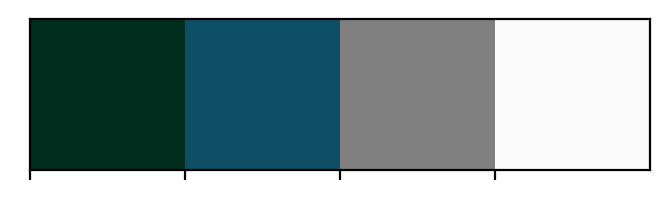

In [11]:
sns.palplot(['#002d1d','#0e4f66','gray','#fbfbfb'])

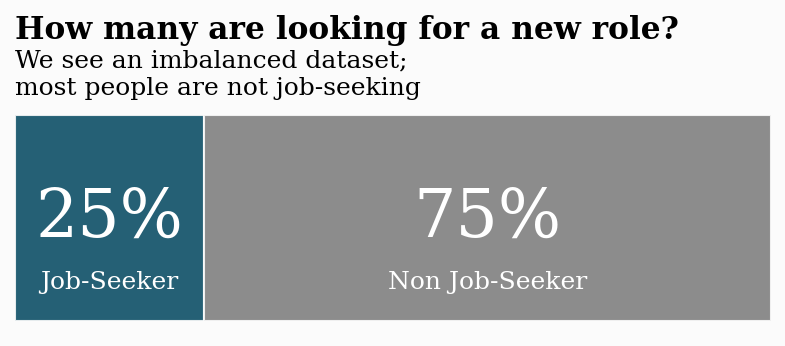

In [33]:
x = train_df.groupby(['target'])['target'].count()
y = len(train_df)
r = ((x/y)).round(2)
ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1, figsize=(6.5, 2), dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) #color of axis
ax.set_facecolor(background_color) #color of graph

#ADD BARS
ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, ec=background_color, label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9, ec=background_color, label='Nn Job-Seeker')

#REMOVE GRAPH INDICATORS
ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
  ax.spines[s].set_visible(False)

# #ADD TEXT
for i in ratio.index:
  ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i), 
              va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
  ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25), 
              va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')

for i in ratio.index:
  ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i] + ratio[0.0][i]/2, i), 
              va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
  ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i] + ratio[0.0][i]/2, -0.25), 
              va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')

#TITLE
fig.text(0.125,1.1,'How many are looking for a new role?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an imbalanced dataset;\nmost people are not job-seeking',fontfamily='serif',fontsize=12)  


plt.show()

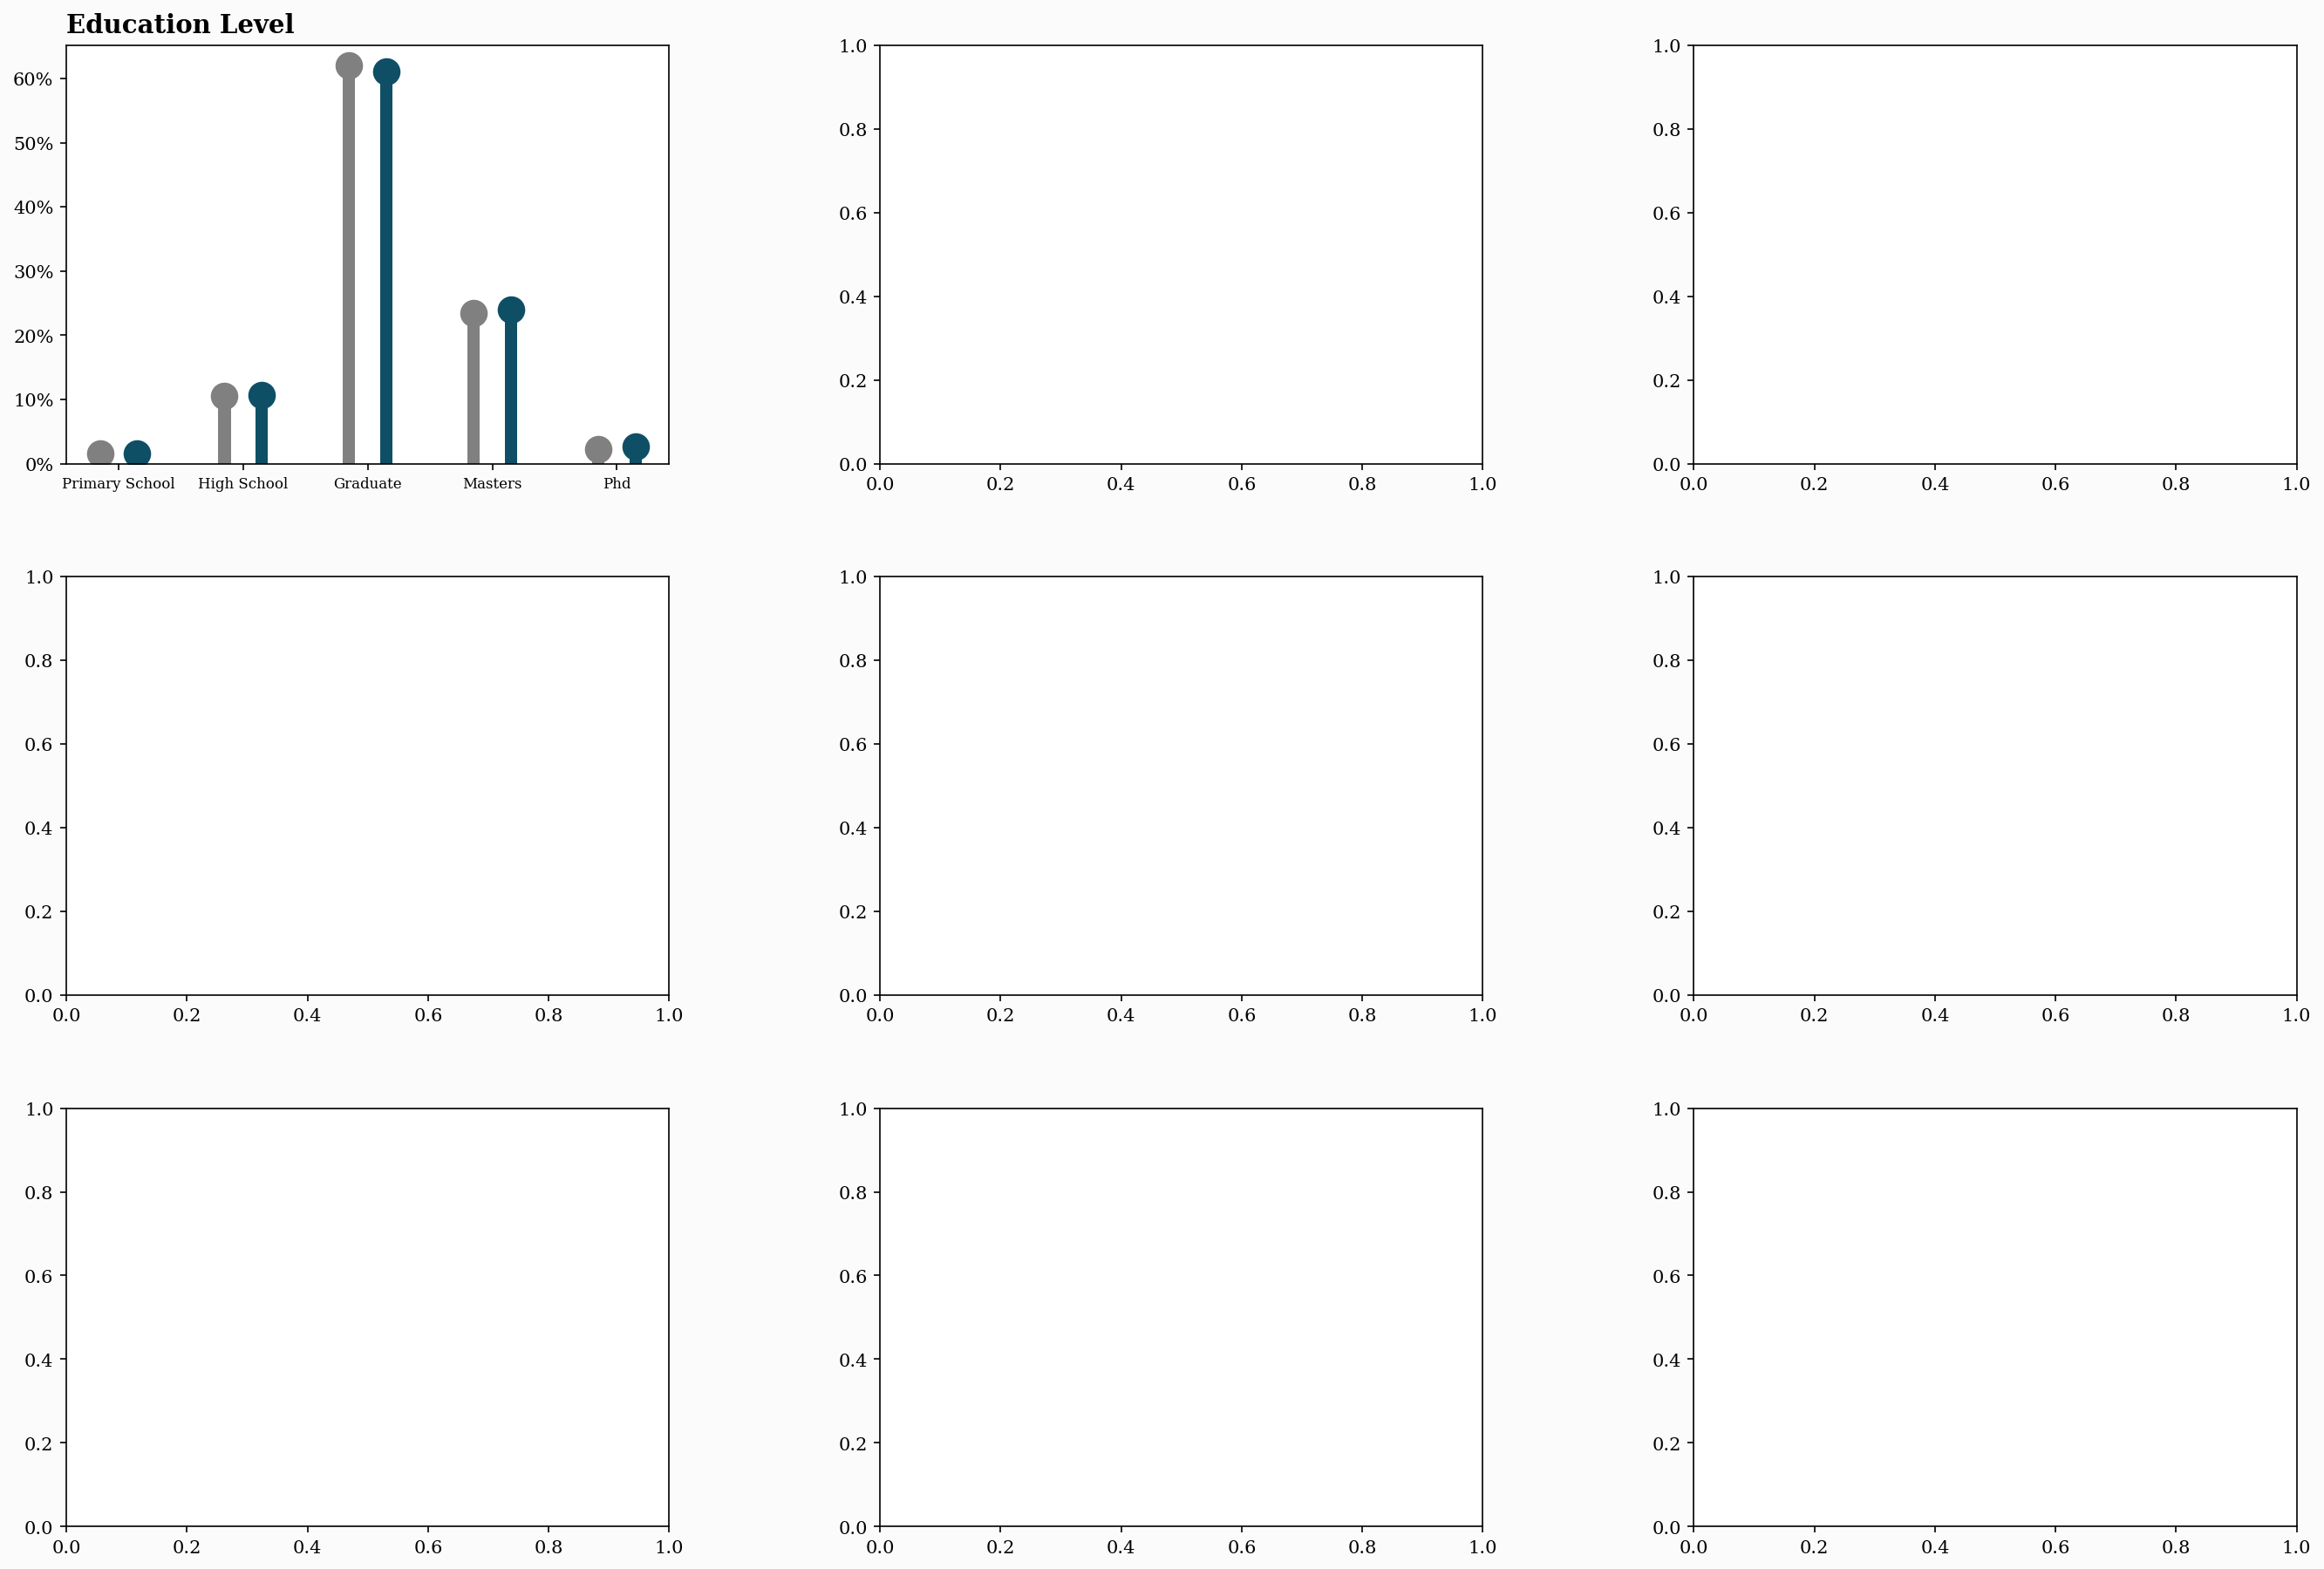

In [133]:
background_color = "#fbfbfb"

#SETUP SUBPLOTS
fig = plt.figure(figsize=(22,15),dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

#AX0 - EDUCATION LEVEL
train = pd.DataFrame(train_df['education_level'].value_counts())

train['Percentage'] = train['education_level'].apply(lambda x: x/train['education_level'].sum()*100)
#set specific order
train.index = pd.Categorical(train.index, ed_order)
train = train.sort_index()

test = pd.DataFrame(test_df["education_level"].value_counts())
test["Percentage"] = test["education_level"].apply(lambda x: x/sum(test["education_level"])*100)
#set specific order
test.index = pd.Categorical(test.index, ed_order)
test = test.sort_index()

ax0.bar(np.arange(len(train.index)), height=train["Percentage"], color="gray", width=0.1)
ax0.scatter(np.arange(len(train.index)), train["Percentage"],s=200, color="gray")
ax0.bar(np.arange(len(test.index))+0.3, height=test["Percentage"], color="#0e4f66", width=0.1)
ax0.scatter(np.arange(len(test.index))+0.3, test["Percentage"], s=200, color="#0e4f66")
ax0.text(0,1.03, 'Education Level', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000", transform=ax0.transAxes) #transform changes x,y values to 0-1 instead of coordinates of datapoints
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xticks(np.arange(len(train.index))+0.3/2)
ax0.set_xticklabels(list(train.index),rotation=0, fontsize=8)


#AX1 - ENROLLED IN UNIVERSITY
train = pd.DataFrame(train_df['enrolled_university'].value_counts())
train['Percentage'] = train['enrolled_university'].apply(lambda x: x/sum(train['enrolled_university'])* 100).loc[enroll_order]
test = pd.DataFrame(test_df['enrolled_university'].value_counts())
test['Percentage'] = test['enrolled_university'].apply(lambda x: x/sum(test['enrolled_university'])* 100).loc[enroll_order]

plt.show()